# Lab - Intro to Pandas - Titanic

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Titanic-Cobh-Harbour-1912.JPG/330px-Titanic-Cobh-Harbour-1912.JPG)

The dataset that we are working on is a list of passenger on the famous ship Titanic. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing a lot passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

**Data dictionary**
 
| Variable | Definition | Key |
|:--:|:--:|:--:|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class, a proxy for socio-economic status (SES) | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Gender | |
| Age | Age in years | |
| sibsp | # of siblings(brother,sister)/spouses(husband, wife) aboard the Titanic |
| parch | # of parents/children aboard the Titanic. Some children travelled only with a nanny, therefore parch=0 for them |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C=Cherbourg, Q=Queenstown, S=Southampton |

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get the data

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')
df = titanic

In [3]:
# Show 5 samples of the dataset
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S


In [4]:
# Show the overview info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Generate a descriptive statistic of the dataset (describe())
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Explore the data

In [6]:
# Who is the youngest/oldest passenger?
df[df['Age'] == df['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [7]:
df[df['Age'] == df['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [8]:
# Find the customers who have the name Jack or Rose
df[df['Name'].str.contains('Jack') | df['Name'].str.contains('Rose')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


In [9]:
# Get 5 samples from the column Name
df['Name'].sample(5)

177     Isham, Miss. Ann Elizabeth
62     Harris, Mr. Henry Birkhardt
206     Backstrom, Mr. Karl Alfred
442      Petterson, Mr. Johan Emil
843     Lemberopolous, Mr. Peter L
Name: Name, dtype: object

In [10]:
# What is the range of the fare in each Passenger Class?
for i in range(4):
  print(df[df['Pclass'] == i]['Fare'].min(), df[df['Pclass'] == i]['Fare'].max())  

nan nan
0.0 512.3292
0.0 73.5
0.0 69.55


In [11]:
# How many missing values are there in the column Age?
df['Age'].isna().sum()

177

In [12]:
# How many missing values are there in the column Cabin?
df['Cabin'].isna().sum()

687

In [13]:
# Analyze the Cabin, which one is for individual, which one is for group(or family)?
cabins = df.groupby('Cabin').count()['PassengerId']
cabins.unique()

array([1, 2, 4, 3])

In [14]:
for i in range(1,5):
  print(cabins[cabins == i].index.to_numpy())

['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B19' 'B3' 'B30' 'B37' 'B38' 'B39' 'B4'
 'B41' 'B42' 'B50' 'B69' 'B71' 'B73' 'B78' 'B79' 'B80' 'B82 B84' 'B86'
 'B94' 'C101' 'C103' 'C104' 'C106' 'C110' 'C111' 'C118' 'C128' 'C148'
 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C54' 'C62 C64' 'C7' 'C70'
 'C82' 'C85' 'C86' 'C87' 'C90' 'C91' 'C95' 'C99' 'D10 D12' 'D11' 'D15'
 'D19' 'D21' 'D28' 'D30' 'D37' 'D45' 'D46' 'D47' 'D48' 'D49' 'D50' 'D56'
 'D6' 'D7' 'D9' 'E10' 'E12' 'E17' 'E31' 'E34' 'E36' 'E38' 'E40' 'E46'
 'E49' 'E50' 'E58' 'E63' 'E68' 'E77' 'F E69' 'F G63' 'F38' 'T']
['B18' 'B20' 'B22' 'B28' 'B35' 'B49' 'B5' 'B51 B53 B55' 'B57 B59 B63 B66'
 'B58 B60' 'B77' 'C123' 'C124' 'C125' 'C126' 'C2' 'C52' 'C65' 'C68' 'C78'
 'C83' 'C92' 'C93' 'D17' 'D20' 'D26' 'D33' 'D35' 'D36' 'E121' 'E24' 'E25'
 'E33' 'E44' 'E67' 'E8' 'F G73' 'F4']
['C22 C26' 'D' 'E101' 'F2' 'F33']
['B96 B98' 'C23 C25 C27' 'G6']


### Analyze the chance of survival

In [15]:
# Had women better chance to survive than men?
def survival_rate(key, value):
  number_survived = df[(df[key] == value) & (df['Survived'] == 1)].shape[0]
  total_number = df[df['Survived'] == 1].shape[0]
  return f'{number_survived/total_number*100:.2f}%'

survival_rate('Sex', 'female')
survival_rate('Sex', 'male')

'31.87%'

In [16]:
# How was the chance of survival in different Pclasses?
print('Pclass 1:', survival_rate('Pclass', 1))
print('Pclass 2:', survival_rate('Pclass', 2))
print('Pclass 3:', survival_rate('Pclass', 3))

Pclass 1: 39.77%
Pclass 2: 25.44%
Pclass 3: 34.80%


In [17]:
# Write a function that takes in an age and return the age range defined as:
# Infants: < 1, Children: < 10, Teens: < 18, Adults: < 40, Middle Age: < 60, Elders: >= 60
def age_range(age):
  if age < 1: return 'Infants'
  elif age < 10: return 'Children'
  elif age < 18: return 'Teens'
  elif age < 40: return 'Adults'
  elif age < 60: return 'Middle Age'
  elif age >= 60: return 'Elders'
  return np.nan
# Create a new column called AgeRange with the function
df['AgeRange'] = df['Age'].apply(age_range)
# How was the chance of survival in different Age Ranges?
age_ranges = df['AgeRange'][df['AgeRange'].notnull()].unique()
for age_range in age_ranges:
  print(age_range, survival_rate('AgeRange', age_range))

Adults 49.12%
Middle Age 15.79%
Children 9.06%
Teens 6.73%
Elders 2.05%
Infants 2.05%


In [18]:
# Did people who travelled alone on Titanic have better chance to survive?
# Hint: Family size can be determined by SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 1
df['IsAlone'][df['FamilySize'] > 1] = 0

print(survival_rate('IsAlone', 1))

47.66%


### Data recovery

In [0]:
# Imagine the first time you had this dataset, there was no feature Sex
# How can you create that feature base on the other features?
import re

df['title'] = df['Name'].apply(lambda x: re.findall('\w+\.', x)[0])
df['title'].unique()

def get_gender(title):
  female = ['Mrs.', 'Miss.', 'Mme.', 'Ms.', 'Lady.', 'Mlle.', 'Countess.']
  if title in female:
    return 'female'
  return 'male'

df['gender'] = df['title'].apply(get_gender)

In [20]:
# After you finished the previous step, one of your co-worker has found data of the gender
# You are curious about how good your prediction is compare to the true label
# Write a function to print out the accuracy score 
def accuracy_score(true, predict):
  return (true == predict).sum()/len(true)

accuracy_score(df['gender'], df['Sex'])

0.9988776655443322

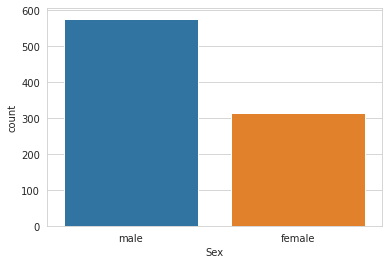

In [21]:
sns.countplot(x='Sex', data=df)

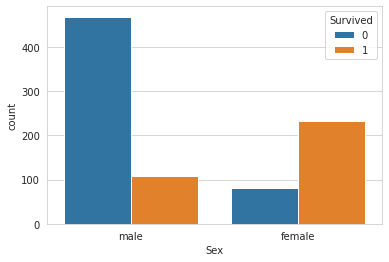

In [22]:
sns.countplot(x='Sex', hue='Survived', data=df)